In [239]:
#make circos plot with each TF_added and/or Promoter around the edge of the circle, with links from TFs to their target Promoters
#the links are colored in a spectrum from blue to red based on the strength of the interaction (fold_change)


In [240]:
library(circlize)

In [241]:
#read in data
df <- read.table("../../../data/luminescence/coexpression_for_manuscript/coexpression_data_for_circos_plot_fold_change.tsv", header = TRUE, sep = "\t")

In [242]:
#keep only the Promoter	TF_added and fold_change columns
df <- df[,c(1,2,7)]

In [243]:
#swap the first two columns
df <- df[, c(2,1,3:ncol(df))]

In [244]:
#get highest and lowest fold change values
max_fc <- max(df$fold_change)
min_fc <- min(df$fold_change)

col_fun = colorRamp2(c(-2, 0, 2), c("red", "purple", "blue"))
#select color based on fold_change
df$color <- col_fun(df$fold_change)


In [245]:
max_fc

[1] 7.15639

In [246]:
min_fc

[1] -0.948241

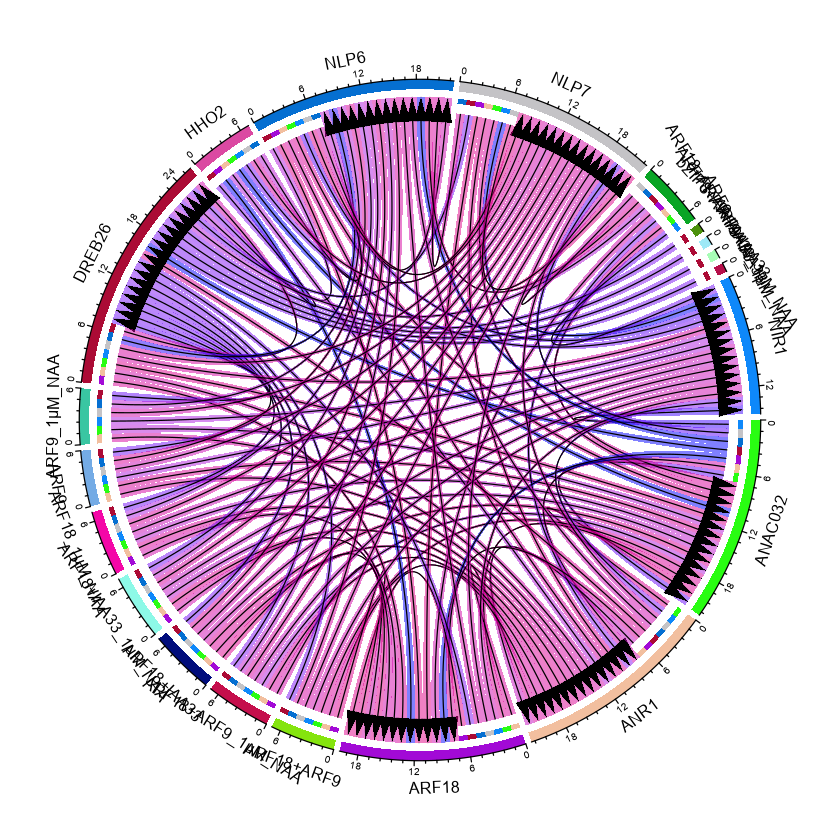

In [247]:
# circos.par(gap.after = c(rep(5, length(unique(df[[1]]))-1), 15, 
#                          rep(5, length(unique(df[[2]]))-1), 15))
#make chord diagram from TF_added to Promoter
chordDiagram(df[1:2],col=df$color, directional=1,direction.type = c("arrows+diffHeight"), diffHeight=0.04)
#add direction of transcription from TF_added to Promoter







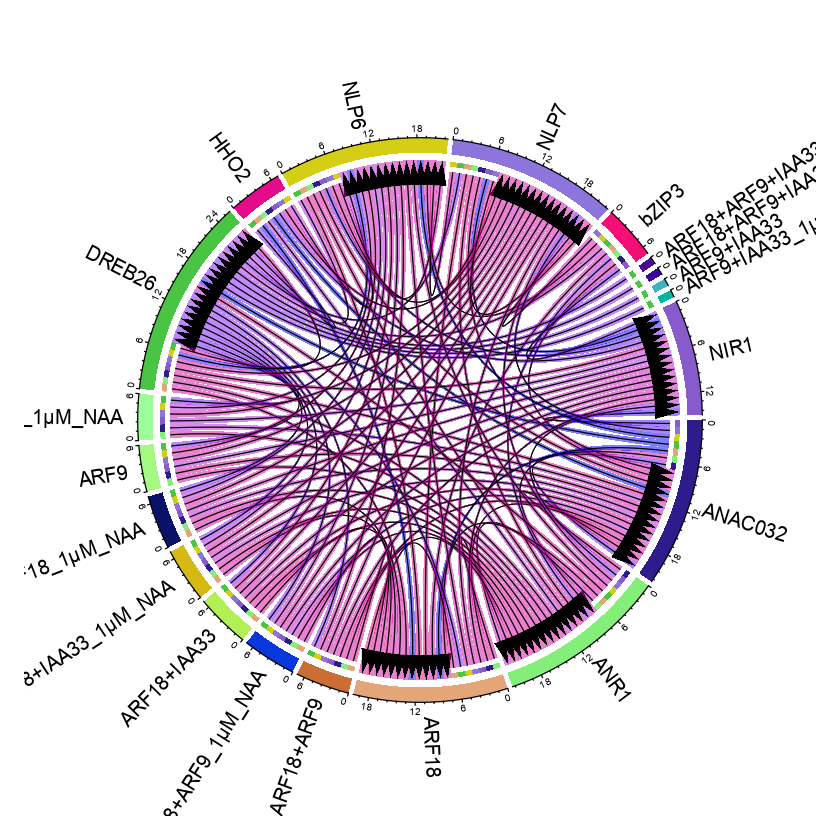

In [248]:
#make labels vertical
chordDiagram(df[1:2],col=df$color, directional=1,direction.type = c("arrows+diffHeight"),annotationTrack = "grid", preAllocateTracks = 1,)
circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
  xlim = get.cell.meta.data("xlim")
  ylim = get.cell.meta.data("ylim")
  sector.name = get.cell.meta.data("sector.index")
  circos.text(mean(xlim), ylim[1] + .1, sector.name, facing = "clockwise", niceFacing = TRUE, adj = c(0, 0.5))
  circos.axis(h = "top", labels.cex = 0.5, major.tick.length = 0.2, sector.index = sector.name, track.index = 2)
}, bg.border = NA)

In [ ]:
#change outside segment colours to match those in previous figures in thesis